In [1]:
import pandas as pd 
import numpy as np

from google.colab import files
uploaded = files.upload()

Saving Train_dataset.xlsx to Train_dataset.xlsx


In [31]:
df=pd.read_excel('Train_dataset.xlsx')
index_code = pd.get_dummies(df['Index'])



ind_code = pd.get_dummies(df['Industry'])

df=df.drop(["Stock Index","Index","Industry"],axis=1)
df = pd.concat([ index_code, ind_code,df],axis = 1).dropna()
df

,BSE,JSE,NSE,NYSE,S&P 500,Energy,Healthcare,Information Tech,Materials,Real Estate,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,0,0,0,1,0,0,0,0,0,1,700.29,12765.84,32.38,45.3500,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.200000,156.987852
1,0,0,0,1,0,0,0,1,0,0,214.52,12765.84,33.25,170.5600,13753356.0,3.10,0.23,0.0164,1.0,0.61,6.910000,560.859622
2,0,0,0,1,0,0,0,1,0,0,943.42,12765.84,88.27,143.5800,6892003.0,7.70,0.23,0.0396,1.0,0.61,6.090000,1279.732874
3,1,0,0,0,0,0,0,0,1,0,828.13,38182.08,73.66,151.7600,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.600000,1121.787632
4,0,0,0,0,1,0,0,0,0,1,671.59,3351.28,23.79,127.8125,3943312.0,8.06,-0.43,0.0244,1.0,1.07,9.460000,382.962534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7378,0,0,1,0,0,0,1,0,0,0,773.91,11270.15,40.28,61.3700,19212221.0,4.34,0.78,0.0340,74.9,0.98,4.970287,248.019321
7379,0,1,0,0,0,0,0,1,0,0,61.97,55722.00,79.56,62.9000,8108942.0,3.48,0.23,0.0528,17.7,0.84,4.968961,494.555631
7380,0,1,0,0,0,0,0,0,1,0,131.99,55722.00,26.16,198.7700,8382586.0,3.04,0.03,0.0359,17.7,1.22,4.996537,500.869063
7381,0,0,0,0,1,0,0,0,1,0,643.72,3351.28,29.24,38.8300,18638400.0,2.66,0.03,0.0581,1.0,1.04,4.970572,113.170686


In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


X_train=df.drop(["Stock Price"],axis=1)
y_train=df["Stock Price"]


scaler.fit(X_train)  
X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)


In [5]:

import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.optimizers import Adam


five_m= Sequential()

five_m.add(Dense(100, input_dim=21, activation='relu'))
five_m.add(Dense(20, activation='relu'))
five_m.add(Dense(10, activation='relu'))
five_m.add(Dense(30,activation='relu'))
five_m.add(Dense(3,activation='relu'))
five_m.add(Dense(1))




five_m.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])

Epoch 1/2000
2/2 [==============================] - 0s 4ms/step - loss: 3366.3115 - mae: 30.7673 - mse: 3366.3115
Epoch 2/2000
2/2 [==============================] - 0s 3ms/step - loss: 3362.1919 - mae: 30.7032 - mse: 3362.1919
Epoch 3/2000
2/2 [==============================] - 0s 3ms/step - loss: 3365.3843 - mae: 30.7414 - mse: 3365.3843
Epoch 4/2000
2/2 [==============================] - 0s 3ms/step - loss: 3361.4104 - mae: 30.7202 - mse: 3361.4104
Epoch 5/2000
2/2 [==============================] - 0s 3ms/step - loss: 3362.1160 - mae: 30.7225 - mse: 3362.1160
Epoch 6/2000
2/2 [==============================] - 0s 3ms/step - loss: 3359.3423 - mae: 30.7189 - mse: 3359.3423
Epoch 7/2000
2/2 [==============================] - 0s 3ms/step - loss: 3359.8711 - mae: 30.7021 - mse: 3359.8711
Epoch 8/2000
2/2 [==============================] - 0s 3ms/step - loss: 3358.2141 - mae: 30.7002 - mse: 3358.2141
Epoch 9/2000
2/2 [==============================] - 0s 3ms/step - loss: 3359.8872 - mae:

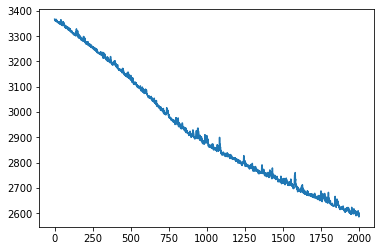

In [33]:
history = five_m.fit(X_train,y_train, epochs = 2000, batch_size = 4096)

from matplotlib import pyplot
# plot train and validation loss
pyplot.plot(history.history['loss'])
pyplot.show()

In [7]:
import pandas as pd 
import numpy as np
from google.colab import files
uploaded = files.upload()

df2=pd.read_excel('Test_dataset.xlsx',sheet_name=1)
df2=df2.drop(0).drop("Stock Index",axis=1).astype(float).dropna()
df2

Saving Test_dataset.xlsx to Test_dataset.xlsx


,Put-Call Ratio,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
1,0.80,0.660,0.77240,0.983224,0.901211,0.898368
2,0.86,0.732,0.85448,1.086645,1.017042,1.029258
3,0.93,0.816,0.95024,1.207302,1.152179,1.181962
4,1.09,1.008,1.16912,1.483091,1.461062,1.531000
5,1.16,1.092,1.26488,1.603749,1.596199,1.683704
...,...,...,...,...,...,...
3327,0.86,0.732,0.85448,1.086645,1.017042,1.029258
3328,0.64,0.468,0.55352,0.707435,0.592327,0.549330
3329,0.67,0.504,0.59456,0.759146,0.650243,0.614775
3330,0.79,0.648,0.75872,0.965987,0.881906,0.876553


In [8]:
df1=pd.read_excel('Test_dataset.xlsx',sheet_name=0)

In [9]:
index_code = pd.get_dummies(df1['Index'])
ind_code = pd.get_dummies(df1['Industry'])
df = pd.concat([ index_code, ind_code,df2],axis = 1).astype(float).dropna()
df

,BSE,JSE,NSE,NYSE,S&P 500,Energy,Healthcare,Information Tech,Materials,Real Estate,Put-Call Ratio,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.80,0.660,0.77240,0.983224,0.901211,0.898368
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.86,0.732,0.85448,1.086645,1.017042,1.029258
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.93,0.816,0.95024,1.207302,1.152179,1.181962
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.09,1.008,1.16912,1.483091,1.461062,1.531000
5,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.16,1.092,1.26488,1.603749,1.596199,1.683704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3326,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.01,0.912,1.05968,1.345197,1.306620,1.356481
3327,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.86,0.732,0.85448,1.086645,1.017042,1.029258
3328,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.64,0.468,0.55352,0.707435,0.592327,0.549330
3329,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.67,0.504,0.59456,0.759146,0.650243,0.614775


In [10]:
df01= pd.concat([ index_code, ind_code,df2["Put-Call Ratio"]],axis = 1).astype(float).dropna().to_numpy()
df02= pd.concat([ index_code, ind_code,df2["Unnamed: 2"]],axis = 1).astype(float).dropna().to_numpy()
df03= pd.concat([ index_code, ind_code,df2["Unnamed: 3"]],axis = 1).astype(float).dropna().to_numpy()
df04= pd.concat([ index_code, ind_code,df2["Unnamed: 4"]],axis = 1).astype(float).dropna().to_numpy()
df05= pd.concat([ index_code, ind_code,df2["Unnamed: 5"]],axis = 1).astype(float).dropna().to_numpy()
df06= pd.concat([ index_code, ind_code,df2["Unnamed: 6"]],axis = 1).astype(float).dropna().to_numpy()

final=np.zeros((5,len(df01),11))

final[0]=df01
final[1]=df02
final[2]=df03
final[3]=df04
final[4]=df05

final=final.reshape(-1,5,11)

In [11]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout,Conv1D,MaxPooling1D,Flatten
from keras.optimizers import Adam
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

model= Sequential()

model.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
# model.add(Dropout(0.2))

model.add(MaxPooling1D(pool_size=2))
# model.add(LSTM(10))
model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])


In [20]:
history = model.fit(final, df["Unnamed: 6"], epochs = 2000, batch_size = 4096)


Epoch 1/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1107 - mae: 0.2634 - mse: 0.1107
Epoch 2/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1106 - mae: 0.2636 - mse: 0.1106
Epoch 3/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1107 - mae: 0.2638 - mse: 0.1107
Epoch 4/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1107 - mae: 0.2636 - mse: 0.1107
Epoch 5/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.1106 - mae: 0.2638 - mse: 0.1106
Epoch 6/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1108 - mae: 0.2641 - mse: 0.1108
Epoch 7/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1107 - mae: 0.2638 - mse: 0.1107
Epoch 8/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1106 - mae: 0.2637 - mse: 0.1106
Epoch 9/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1106 - mae: 0.2636 - mse: 0.1106
Epoch 10/2000
1/1 [==================

In [21]:
final=np.zeros((5,len(df01),11))

final[0]=df02
final[1]=df03
final[2]=df04
final[3]=df05
final[4]=df06

final=final.reshape(-1,5,11)

In [22]:
Y_pred=model.predict(final)

In [23]:
put_cal=pd.DataFrame(Y_pred)

In [24]:
res=put_cal.join(df1["Stock Index"])

In [25]:
res=res.set_index("Stock Index").rename({0:"put_col_ratio"},axis='columns')

In [26]:
res.to_excel("output.xlsx")  

In [35]:
df=pd.read_excel('Test_dataset.xlsx',sheet_name=0)
df=df.drop(["Stock Index","Index","Industry"],axis=1)
df = pd.concat([ index_code, ind_code,df],axis = 1).astype(float).dropna()

In [ ]:
df

In [37]:
X_test = scaler.transform(df)

In [38]:
Y_pred=five_m.predict(X_test)

In [39]:
put_cal=pd.DataFrame(Y_pred)
res=put_cal.join(df1["Stock Index"])
res=res.set_index("Stock Index").rename({0:"put_col_ratio"},axis='columns')

In [40]:
res.to_excel("output_part1.xlsx")  

In [41]:
import pandas as pd 
import numpy as np

from google.colab import files
uploaded = files.upload()


Saving Test_dataset for part 2.xlsx to Test_dataset for part 2.xlsx


In [42]:
df=pd.read_excel('Test_dataset for part 2.xlsx',sheet_name=0)
df=df.drop(["Stock Index","Index","Industry"],axis=1)
df = pd.concat([ index_code, ind_code,df],axis = 1).astype(float).dropna()

In [43]:
X_test = scaler.transform(df)
Y_pred=five_m.predict(X_test)
put_cal=pd.DataFrame(Y_pred)
res=put_cal.join(df1["Stock Index"])
res=res.set_index("Stock Index").rename({0:"put_col_ratio"},axis='columns')
res.to_excel("output_part2.xlsx")  